# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#!pip install ipywidgets

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

# Create training set and define training dataloader
## YOUR CODE HERE ##

dataset = torchvision.datasets.MNIST(root = 'data', download = True, train = True, transform = transform)
train_subset, val_subset = torch.utils.data.random_split(dataset, [int(len(dataset) * 0.8), int(len(dataset) * 0.2)])

data_loader = torch.utils.data.DataLoader(train_subset, batch_size = 64, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size = 64, shuffle = True)


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

I transformed the data into a tensor and then normalized it between -1 and 1, so that it would better work with activation functions. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


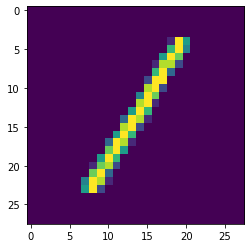

5


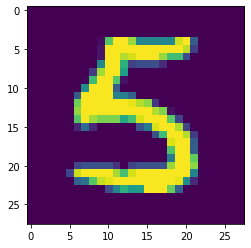

3


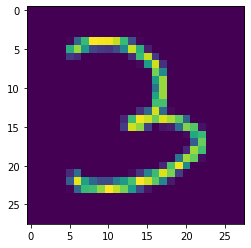

4


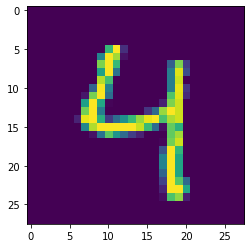

8


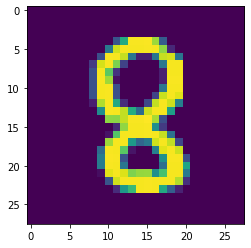

In [5]:
# Explore data
show5(data_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [30]:
28*28*16

12544

In [47]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.activation = F.relu
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,16,5, padding = 2), #28 x 28
            nn.MaxPool2d(2,2), #14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout2d(0.2),
            nn.Conv2d(16,32,5, padding = 2), #14, 14
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout2d(0.2)
        )
        
        self.layer1 = nn.Sequential(
            nn.Linear(1568,200),
            nn.BatchNorm1d(200),
            nn.Dropout(0.5)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(200,80),
            nn.BatchNorm1d(80),
            nn.Dropout(0.5)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(80,60),
            nn.BatchNorm1d(60),
            nn.Dropout(0.5)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(60,40),
            nn.BatchNorm1d(40),
            nn.Dropout(0.5)
        )
        self.layer5 = nn.Sequential(
            nn.Linear(40,20),
            nn.BatchNorm1d(20),
            nn.Dropout(0.2)
        )
        self.layer6 = nn.Linear(20,10)
        
    def forward(self, x):
        
        #x = self.dropout2D(self.conv(x))
        #x = self.activation(x)
        x = self.conv1(x)
        x = torch.flatten(x,start_dim = 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.layer6(x)
        return(x)
    

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [48]:
model = Net()

if torch.cuda.is_available():
    model = model.to('cuda') 

In [49]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr =0.00001, weight_decay = 0.1, betas = (0.9, 0.999))

import multiprocessing

n_workers = multiprocessing.cpu_count()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

Plot the training loss (and validation loss/accuracy, if recorded).

In [50]:
epochNumber = 10

model.train()

# Establish a list for our history
trainLoss_history = list()
valLoss_history = list()
patience = 5
tally = 0

for epoch in range(epochNumber):
    
    #set train loss to zero to start
    trainLoss = 0.0
    trainCorrect = 0
    ## Train the model
    for batchNum, data in enumerate(data_loader):

        inputs, target = data
        
        if torch.cuda.is_available():
            inputs, target = inputs.to('cuda'), target.to('cuda') 
        
        optimizer.zero_grad()
        output = model(inputs)
        
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(output.data, 1)
        trainCorrect += (preds == target).sum().item()
        trainLoss += loss.item()
    
    print(f'Epoch {epoch + 1} training accuracy: {trainCorrect/len(data_loader):.2f}% training loss: {trainLoss/len(data_loader):.5f}')
    trainLoss_history.append(trainLoss/len(data_loader))
    
    #now validation
    with torch.no_grad():
        
        model.eval()
        
        validLoss = 0
        ValCorrect = 0
        for batchNum, data in enumerate(val_loader):
            
            inputs, target = data
            if torch.cuda.is_available():
                inputs, target = inputs.to('cuda'), target.to('cuda') 
            
            testOut = model(inputs)
            loss_valid = criterion(testOut, target)
            
            _, preds = torch.max(testOut.data, 1)
            validLoss += loss_valid.data.item()
            ValCorrect += (preds == target).sum().item()
            
    print(f"Epoch {epoch+1}: validation accuracy { ValCorrect/len(val_loader):.2f}%, validation loss {validLoss/len(val_loader):.5f}")
    
    if epoch > 0:
        if valLoss_history[-1] < validLoss/len(val_loader) :
            tally += 1
        if tally >= patience:
            break
    
    valLoss_history.append(validLoss/len(val_loader))
    
    

            

Epoch 1 training accuracy: 7.18% training loss: 2.36380
Epoch 1: validation accuracy 10.30%, validation loss 145.65671
Epoch 2 training accuracy: 35.27% training loss: 1.75265
Epoch 2: validation accuracy 54.35%, validation loss 58.19558
Epoch 3 training accuracy: 57.49% training loss: 0.49485
Epoch 3: validation accuracy 59.16%, validation loss 19.88003
Epoch 4 training accuracy: 60.10% training loss: 0.25913
Epoch 4: validation accuracy 60.48%, validation loss 14.44072
Epoch 5 training accuracy: 60.93% training loss: 0.20369
Epoch 5: validation accuracy 61.05%, validation loss 12.07360
Epoch 6 training accuracy: 61.37% training loss: 0.17878
Epoch 6: validation accuracy 61.32%, validation loss 10.97518
Epoch 7 training accuracy: 61.58% training loss: 0.16567
Epoch 7: validation accuracy 61.49%, validation loss 10.34777
Epoch 8 training accuracy: 61.70% training loss: 0.15768
Epoch 8: validation accuracy 61.64%, validation loss 9.91942
Epoch 9 training accuracy: 61.79% training loss: 

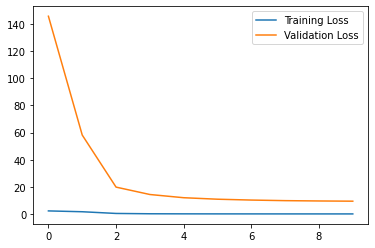

In [51]:
plt.plot(trainLoss_history, label="Training Loss")
plt.plot(valLoss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root = 'data', download = True, train = False, transform = transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size = 32, shuffle = True)
#now validation
with torch.no_grad():
    model.eval()
    trainCorrect = 0
    validLoss = 0
    for batchNum, data in enumerate(test_loader):

        inputs, target = data
        if torch.cuda.is_available():
            inputs, target = inputs.to('cuda'), target.to('cuda') 

        testOut = model(inputs)
        loss_test = criterion(testOut, target)
        trainCorrect += (preds == target).sum().item()
        
print(f"Testing loss {loss_test:.5f}, Testing accuracy {trainCorrect/len(test_loader):.5f"}")

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##